<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


C:\Users\akrit\AppData\Local\Temp\ipykernel_6328\109054293.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[g for g, c in genre_counts.most_common(10)],


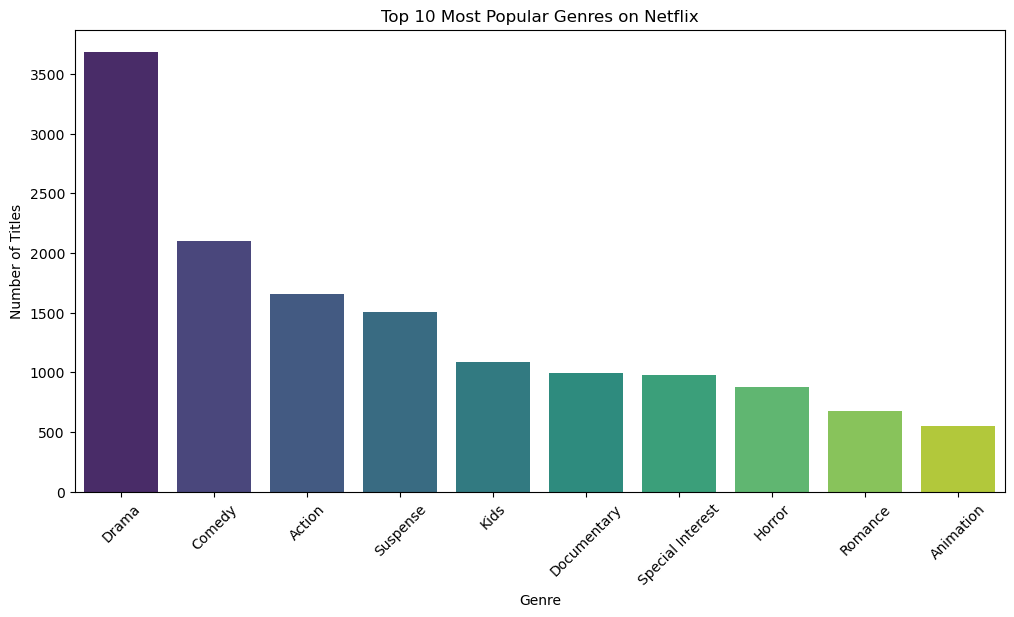

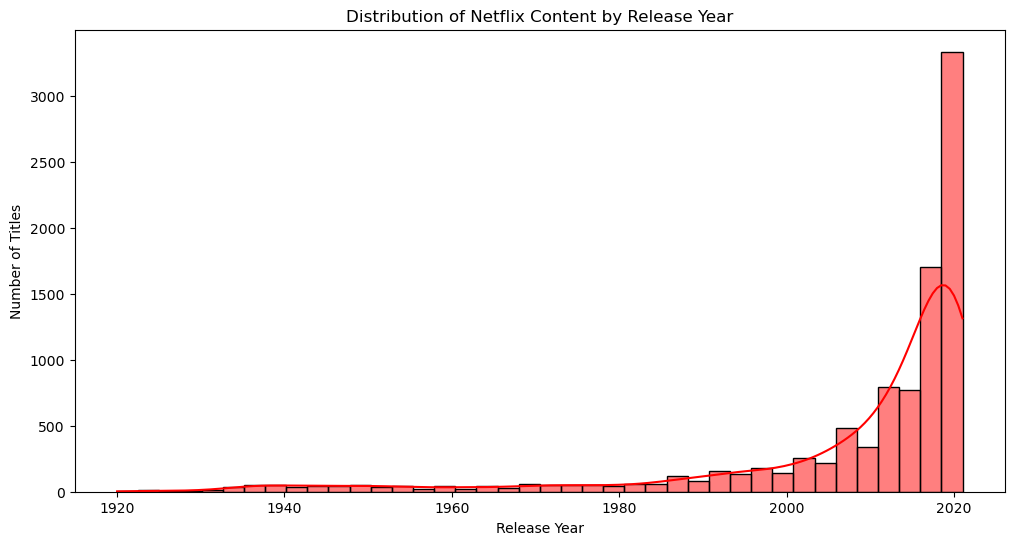

C:\Users\akrit\AppData\Local\Temp\ipykernel_6328\109054293.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df_clean, palette='rocket')


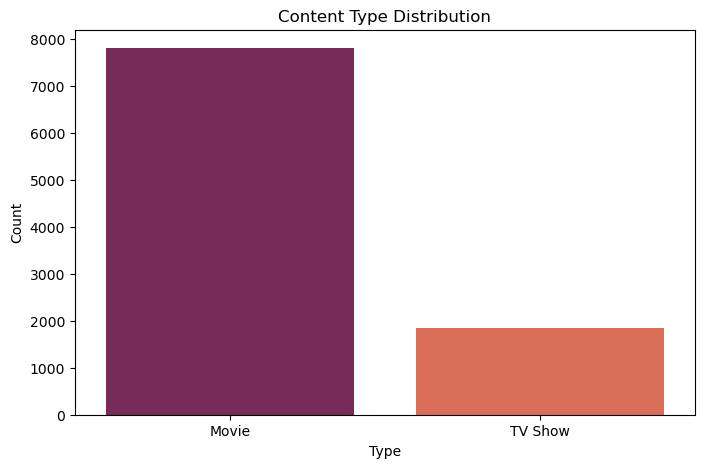

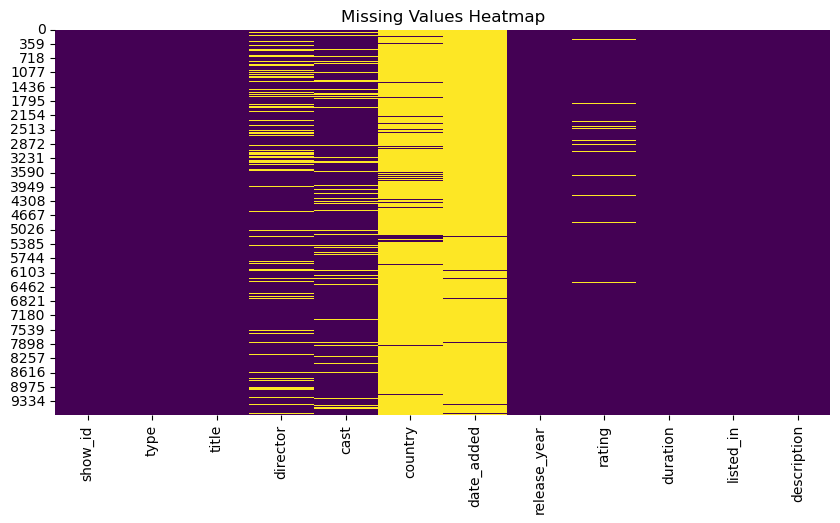

C:\Users\akrit\AppData\Local\Temp\ipykernel_6328\109054293.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=df_clean, order=df_clean['rating'].value_counts().index, palette='mako')


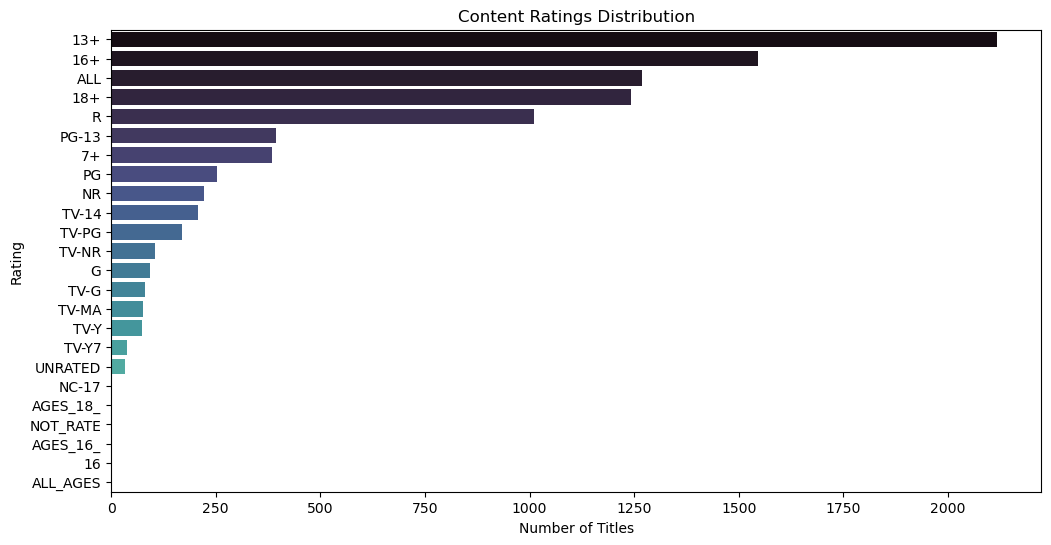

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('amazon_prime_titles.csv')

# Data Cleaning & Preprocessing
df.info()
df.isnull().sum()

# Drop rows with missing values in important columns
df_clean = df.dropna(subset=['type', 'title', 'listed_in', 'release_year'])

# Analyze Genre Popularity
# Genres are separated by commas; expand to count each genre
from collections import Counter

genre_list = df_clean['listed_in'].str.split(', ')
all_genres = [genre for sublist in genre_list for genre in sublist]
genre_counts = Counter(all_genres)

# Bar plot for top 10 genres
plt.figure(figsize=(12,6))
sns.barplot(x=[g for g, c in genre_counts.most_common(10)],
            y=[c for g, c in genre_counts.most_common(10)],
            palette='viridis')
plt.title('Top 10 Most Popular Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

# Release Year Distribution
plt.figure(figsize=(12,6))
sns.histplot(df_clean['release_year'], bins=40, kde=True, color='red')
plt.title('Distribution of Netflix Content by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

# Content Type Distribution (Movies vs TV Shows)
plt.figure(figsize=(8,5))
sns.countplot(x='type', data=df_clean, palette='rocket')
plt.title('Content Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# Heatmap: Missing Values (Optional, for cleaning insight)
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# User Ratings Analysis (if column exists)
if 'rating' in df_clean.columns:
    plt.figure(figsize=(12,6))
    sns.countplot(y='rating', data=df_clean, order=df_clean['rating'].value_counts().index, palette='mako')
    plt.title('Content Ratings Distribution')
    plt.xlabel('Number of Titles')
    plt.ylabel('Rating')
    plt.show()
